In [8]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [10]:
grid = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

start = (0,0)
end = (9,9)

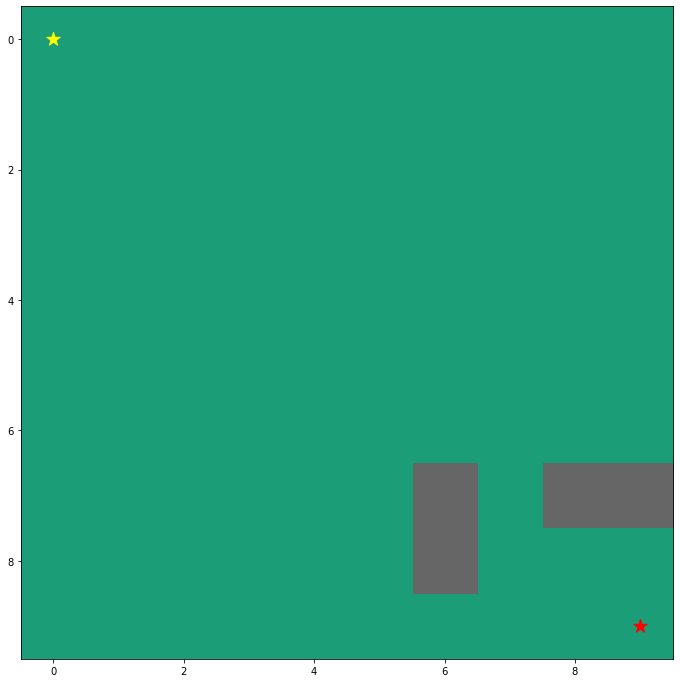

In [12]:
fig, ax = plt.subplots(figsize=(12,12))

ax.imshow(grid,cmap=plt.cm.Dark2)

ax.scatter(start[1],start[0], marker = "*", color = "yellow", s = 200)

ax.scatter(end[1],end[0], marker = "*", color = "red", s = 200)

plt.show()



In [13]:
def heuristic(a, b):

    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

 

In [19]:
def astar(array, start, end):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]

    close_set = set()

    came_from = {}

    gscore = {start:0}

    fscore = {start:heuristic(start, end)}

    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
    
    
    while oheap:

        current = heapq.heappop(oheap)[1]

        if current == end:

            data = []

            while current in came_from:

                data.append(current)

                current = came_from[current]

            return data

        close_set.add(current)

        for i, j in neighbors:

            neighbor = current[0] + i, current[1] + j            

            tentative_g_score = gscore[current] + heuristic(current, neighbor)

            if 0 <= neighbor[0] < array.shape[0]:

                if 0 <= neighbor[1] < array.shape[1]:                

                    if array[neighbor[0]][neighbor[1]] == 1:

                        continue

                else:

                    # array bound y walls

                    continue

            else:

                # array bound x walls

                continue
 

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):

                continue
 

            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:

                came_from[neighbor] = current

                gscore[neighbor] = tentative_g_score

                fscore[neighbor] = tentative_g_score + heuristic(neighbor, end)

                heapq.heappush(oheap, (fscore[neighbor], neighbor)) 

In [22]:
route = astar(grid, start, end)
route = route + [start]
route = route[::-1]
print(route)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


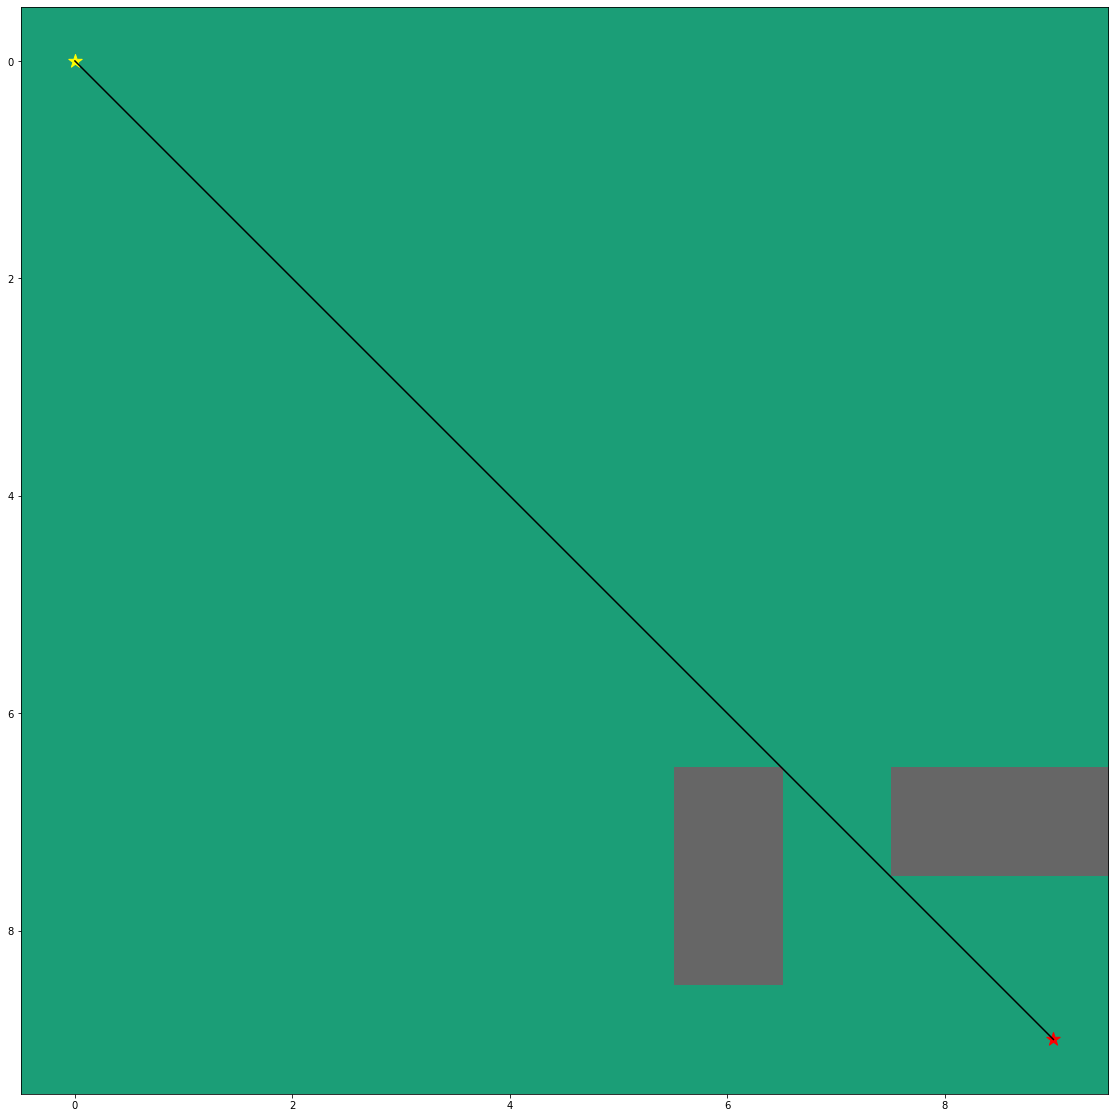

In [24]:
x_coords = []

y_coords = []

for i in (range(0,len(route))):

    x = route[i][0]

    y = route[i][1]

    x_coords.append(x)

    y_coords.append(y)

# plot map and path

fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(grid, cmap=plt.cm.Dark2)

ax.scatter(start[1],start[0], marker = "*", color = "yellow", s = 200)

ax.scatter(end[1],end[0], marker = "*", color = "red", s = 200)

ax.plot(y_coords,x_coords, color = "black")

plt.show()

 